[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hackintosh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hackintosh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


no of sentences15
Internet power and business trend changes have provided a broad term for data analytics – Big Data.
However traditional methods are not efficient for changing business needs.
This article presents the latest market trends in BI systems implementation by com- paring Agile with traditional methods.
Both studies prove that Agile methods might be more effective in BI projects from an end-user perspective and give first results and added value in a much shorter time compared to a traditional approach.
Today organizations require BI solu- tions more than they needed them in previous years and decades.
Thus BI projects final products are often found useless due to organizational needs that have changed during the time of project design and implementation (Eckerson, 2007a, 2007b; Marjanovic, 2011).
Traditional methods of BI implementation are no longer efficient.
Agile methods brought a new view to a project delivery.
In this article effectiveness is measured from the added v

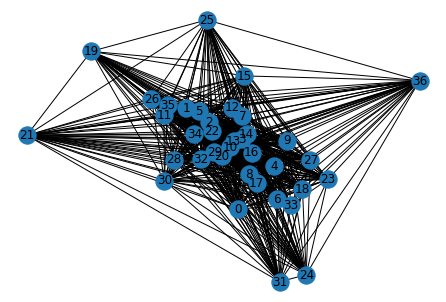

In [4]:
#importing the libraries

import nltk
import numpy as np
import re
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')   # one time execution
nltk.download('stopwords')  # one time execution
from nltk.corpus import stopwords
 
#sentence tokenization
file = 'input.txt'
file = open(file , 'r')
text = file.read()
from nltk.tokenize import sent_tokenize
sentence = sent_tokenize(text)

# cleaning the sentences

corpus = []
for i in range(len(sentence)):
    sen = re.sub('[^a-zA-Z]', " ", sentence[i])  
    sen = sen.lower()                            
    sen=sen.split()                         
    sen = ' '.join([i for i in sen if i not in stopwords.words('english')])   
    corpus.append(sen)
    

#creating word vectors

n=300
all_words = [i.split() for i in corpus]
model = Word2Vec(all_words, min_count=1,size= n)

# creating sentence vectors

sen_vector=[]
for i in corpus:
    
    plus=0
    for j in i.split():
        plus+=model.wv[j]
    plus = plus/len(plus)
    
    sen_vector.append(plus)
    
# creating cosine similarity matrix 

sim_mat = np.zeros([len(sen_vector), len(sen_vector)])
for i in range(len(sen_vector)):
      for j in range(len(sen_vector)):
        if i != j:
              sim_mat[i][j] = cosine_similarity(sen_vector[i].reshape(1,n),sen_vector[j].reshape(1,n))[0][0]

norm = np.sum(sim_mat, axis=1)
sim_mat = np.divide(sim_mat, norm, where=norm!=0)

#calculating Textrank scores for each sentence

import networkx as nx

G = nx.from_numpy_array(np.array(sim_mat))  
nx.draw(G, with_labels=True) 
scores = nx.pagerank_numpy(G)

#printing top k sentences carrying highest PageRank scores
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentence)), reverse=True)

k=int(input('no of sentences'))
my_list=[]
for i in range(k):
    my_list.append(ranked_sentences[i][1])
    
for i in sentence:
    if i in my_list:
        print(i)